In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("datasets/IMDB Dataset.csv")

In [3]:
pd.set_option("max.colwidth",0)

In [4]:
df.sample()

,review,sentiment
20418,"I don't know what it is about Donald Sutherland's acting style, or vocal style, but he always seems to be acting from behind a massive wad of soggy Kleenex. He's just...I don't know, THICK? Somnambulistic? On meds? Weird.<br /><br />That said, I just saw the flick again for the first time since its original release, and frankly, I don't remember it ending anything LIKE that. A bad ending, too, because nothing gets tied off. What about the dead husband? The annoying child (and was the kid dubbed?)? The Scotland Yard and military pursuers? I would have liked something wrapping things up and giving some dramatic closure to it all, not just the big panoramic pull-away.<br /><br />And what woman sleeps with the man she knows just killed her husband? Even if she was trying to allay Needle's suspicions to protect her kid, she could always have had a headache. That last encounter made me feel way too itchy and uncomfortable...",negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["sentiment"] = label.fit_transform(df["sentiment"])

In [7]:
df

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, f

In [8]:
df.describe()

,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [9]:
df.head(3)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",1


In [10]:
df["review"] = df["review"].apply(lambda x : x.replace("<br />",""))

In [11]:
df.sample()

,review,sentiment
13796,"This is surely one of the worst films ever made. Each scene is painful. You will groan at the flimsy attempts at humor, the awkward camera work, the sexism and racism, the ridiculous story line, the wooden acting. Poor Joan Bennett; she is the only one in the movie who is not an embarrassment. In all, dreadful.",0


In [12]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
df.duplicated().sample(2)

49795    False
15993    False
dtype: bool

In [14]:
def remove_punc(test_str):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 


    for ele in test_str:
        if ele in punc:
            test_str = test_str.replace(ele, "")
    return test_str
df["review"] = df["review"].apply(remove_punc)

In [15]:
df.sample()

,review,sentiment
24669,Heres another of the 1940s westerns that I watch whenever it comes on TCM or FMC because although it may be flawed historically it is extremely entertaining and well acted plus its got Randolph Scott my favorite actor second only to Gary CooperWell OK fourth behind COOP Charlton Heston and Gregory Peck But the film itself to me anyway is reasonably historically accurate and as I said before well acted and flows very wellI bet Ive seen it 50 or 60 times and enjoy each viewing more than the one before I have it on tape from TCM but would buy it in a minute if it ever came out on DVD See it if you havent I guarantee youll like it,1


In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
df["review"] = df["review"].apply(lambda x : ' '.join(x.lower() for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df.sample()

,review,sentiment
31908,brilliant overacting lesley ann warren best dramatic hobo lady i ever seen love scenes clothes warehouse second none the corn face classic good anything blazing saddles the take lawyers also superb after accused turncoat selling boss dishonest lawyer pepto bolt shrugs indifferently im lawyer says three funny words jeffrey tambor favorite later larry sanders show fantastic mad millionaire wants crush ghetto his character malevolent usual the hospital scene scene homeless invade demolition site alltime classics look legs scene two big diggers fighting one bleeds this movie gets better time i see quite often,1


In [18]:
from textblob import Word

nltk.download('wordnet')

def lemmatize_words(text): 
    words = [Word(word).lemmatize() for word in text.split()]
    return " ".join(words)

# apply function to review
df['review'] = df.review.apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
df.sample()

,review,sentiment
48039,this film worse cat people i saw week it 80 style mtv punk rocker real one anti social today pc commercial type frat boy bad guy called splater i really like splater film blue lighting 80 feel rest look like low budget canadian schlop i seen much living great country realize type movie made tax break avoid cost,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["review"], df["sentiment"], random_state=42, test_size=0.2)

In [21]:
X_train.shape

(40000,)

In [22]:
y_train.shape

(40000,)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn import svm

from sklearn.svm import SVC
 
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ("vec", TfidfVectorizer(min_df= 10, ngram_range=(1,3))),
    ("svc", svm.SVC(kernel='linear'))
])

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer(min_df=10, ngram_range=(1, 3))),
                ('svc', SVC(kernel='linear'))])

In [31]:
y_pred = pipeline.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
accuracy_score(y_test, y_pred)

0.9043

<Axes: >

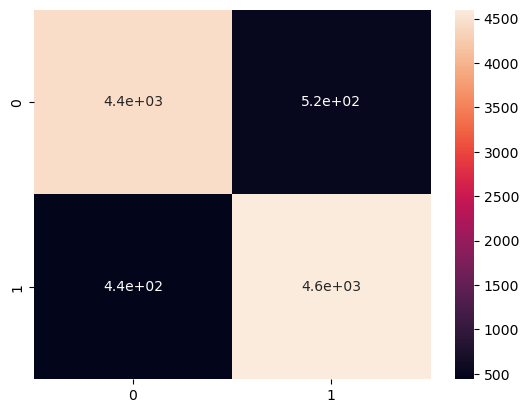

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [33]:
print(confusion_matrix(y_test,y_pred))

[[4442  519]
 [ 438 4601]]


In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4880
           1       0.91      0.90      0.91      5120

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [25]:
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
model = Pipeline([
    ("vec", TfidfVectorizer(min_df= 10, ngram_range=(1,3))),
    ("xgb", XGBClassifier())
])

In [26]:
model.fit(X_train,y_train)

Pipeline(steps=[('vec', TfidfVectorizer(min_df=10, ngram_range=(1, 3))),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [27]:
y_pred_xg = model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred_xg)

0.8587

<Axes: >

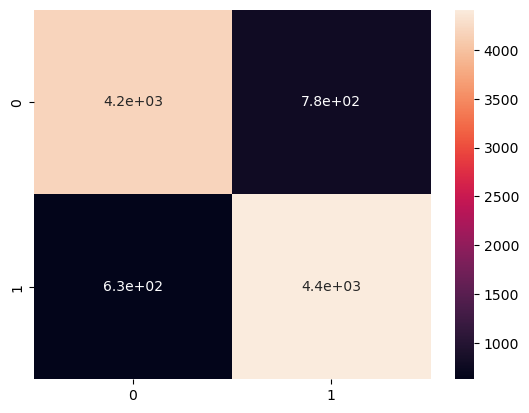

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred_xg),annot=True)

In [35]:
print(confusion_matrix(y_test,y_pred_xg))

[[4176  785]
 [ 628 4411]]
